# Practical 18

# Develop an application to identify which flower belong to which category using Random Forest Classifier.

In [1]:
from sklearn import datasets  #importing the libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
iris = datasets.load_iris()  #importing the dataset

In [2]:
print(iris.target_names)  # the output column

['setosa' 'versicolor' 'virginica']


In [3]:
print(iris.feature_names) # Independent features

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
dataset = pd.DataFrame(iris.data)  # dataframe of independent variables

In [5]:
print(dataset.head())

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


In [6]:
dataset['species'] = iris.target  

In [7]:
dataset.columns =['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'species']
print(dataset)

     sepallength  sepalwidth  petallength  petalwidth  species
0            5.1         3.5          1.4         0.2        0
1            4.9         3.0          1.4         0.2        0
2            4.7         3.2          1.3         0.2        0
3            4.6         3.1          1.5         0.2        0
4            5.0         3.6          1.4         0.2        0
..           ...         ...          ...         ...      ...
145          6.7         3.0          5.2         2.3        2
146          6.3         2.5          5.0         1.9        2
147          6.5         3.0          5.2         2.0        2
148          6.2         3.4          5.4         2.3        2
149          5.9         3.0          5.1         1.8        2

[150 rows x 5 columns]


In [8]:
from sklearn.model_selection import train_test_split  #spliting the training and testing dataset
X = dataset.iloc[:, : -1]
y = dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 8)

In [9]:
from sklearn.ensemble import RandomForestClassifier  # Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=500)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn import metrics
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9111111111111111


In [10]:
clf.predict([[3, 3, 2, 2]])  # predicting which type of flower it is

C:\Users\ANIKET KUMAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [11]:
clf.predict([[3, 5, 5, 2]])

C:\Users\ANIKET KUMAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

In [12]:
from sklearn.ensemble import RandomForestClassifier  
# Train the model using the training sets 
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
# using the feature importance variable 
feature_imp = pd.Series(clf.feature_importances_, index = iris.feature_names).sort_values(ascending = False)
feature_imp

petal width (cm)     0.513184
petal length (cm)    0.343157
sepal length (cm)    0.101886
sepal width (cm)     0.041773
dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
X=dataset[['petallength', 'petalwidth','sepallength']]
y=dataset['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)  # Split dataset into training set and test set

In [15]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn import metrics
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9777777777777777


In [16]:
clf.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1254871954)

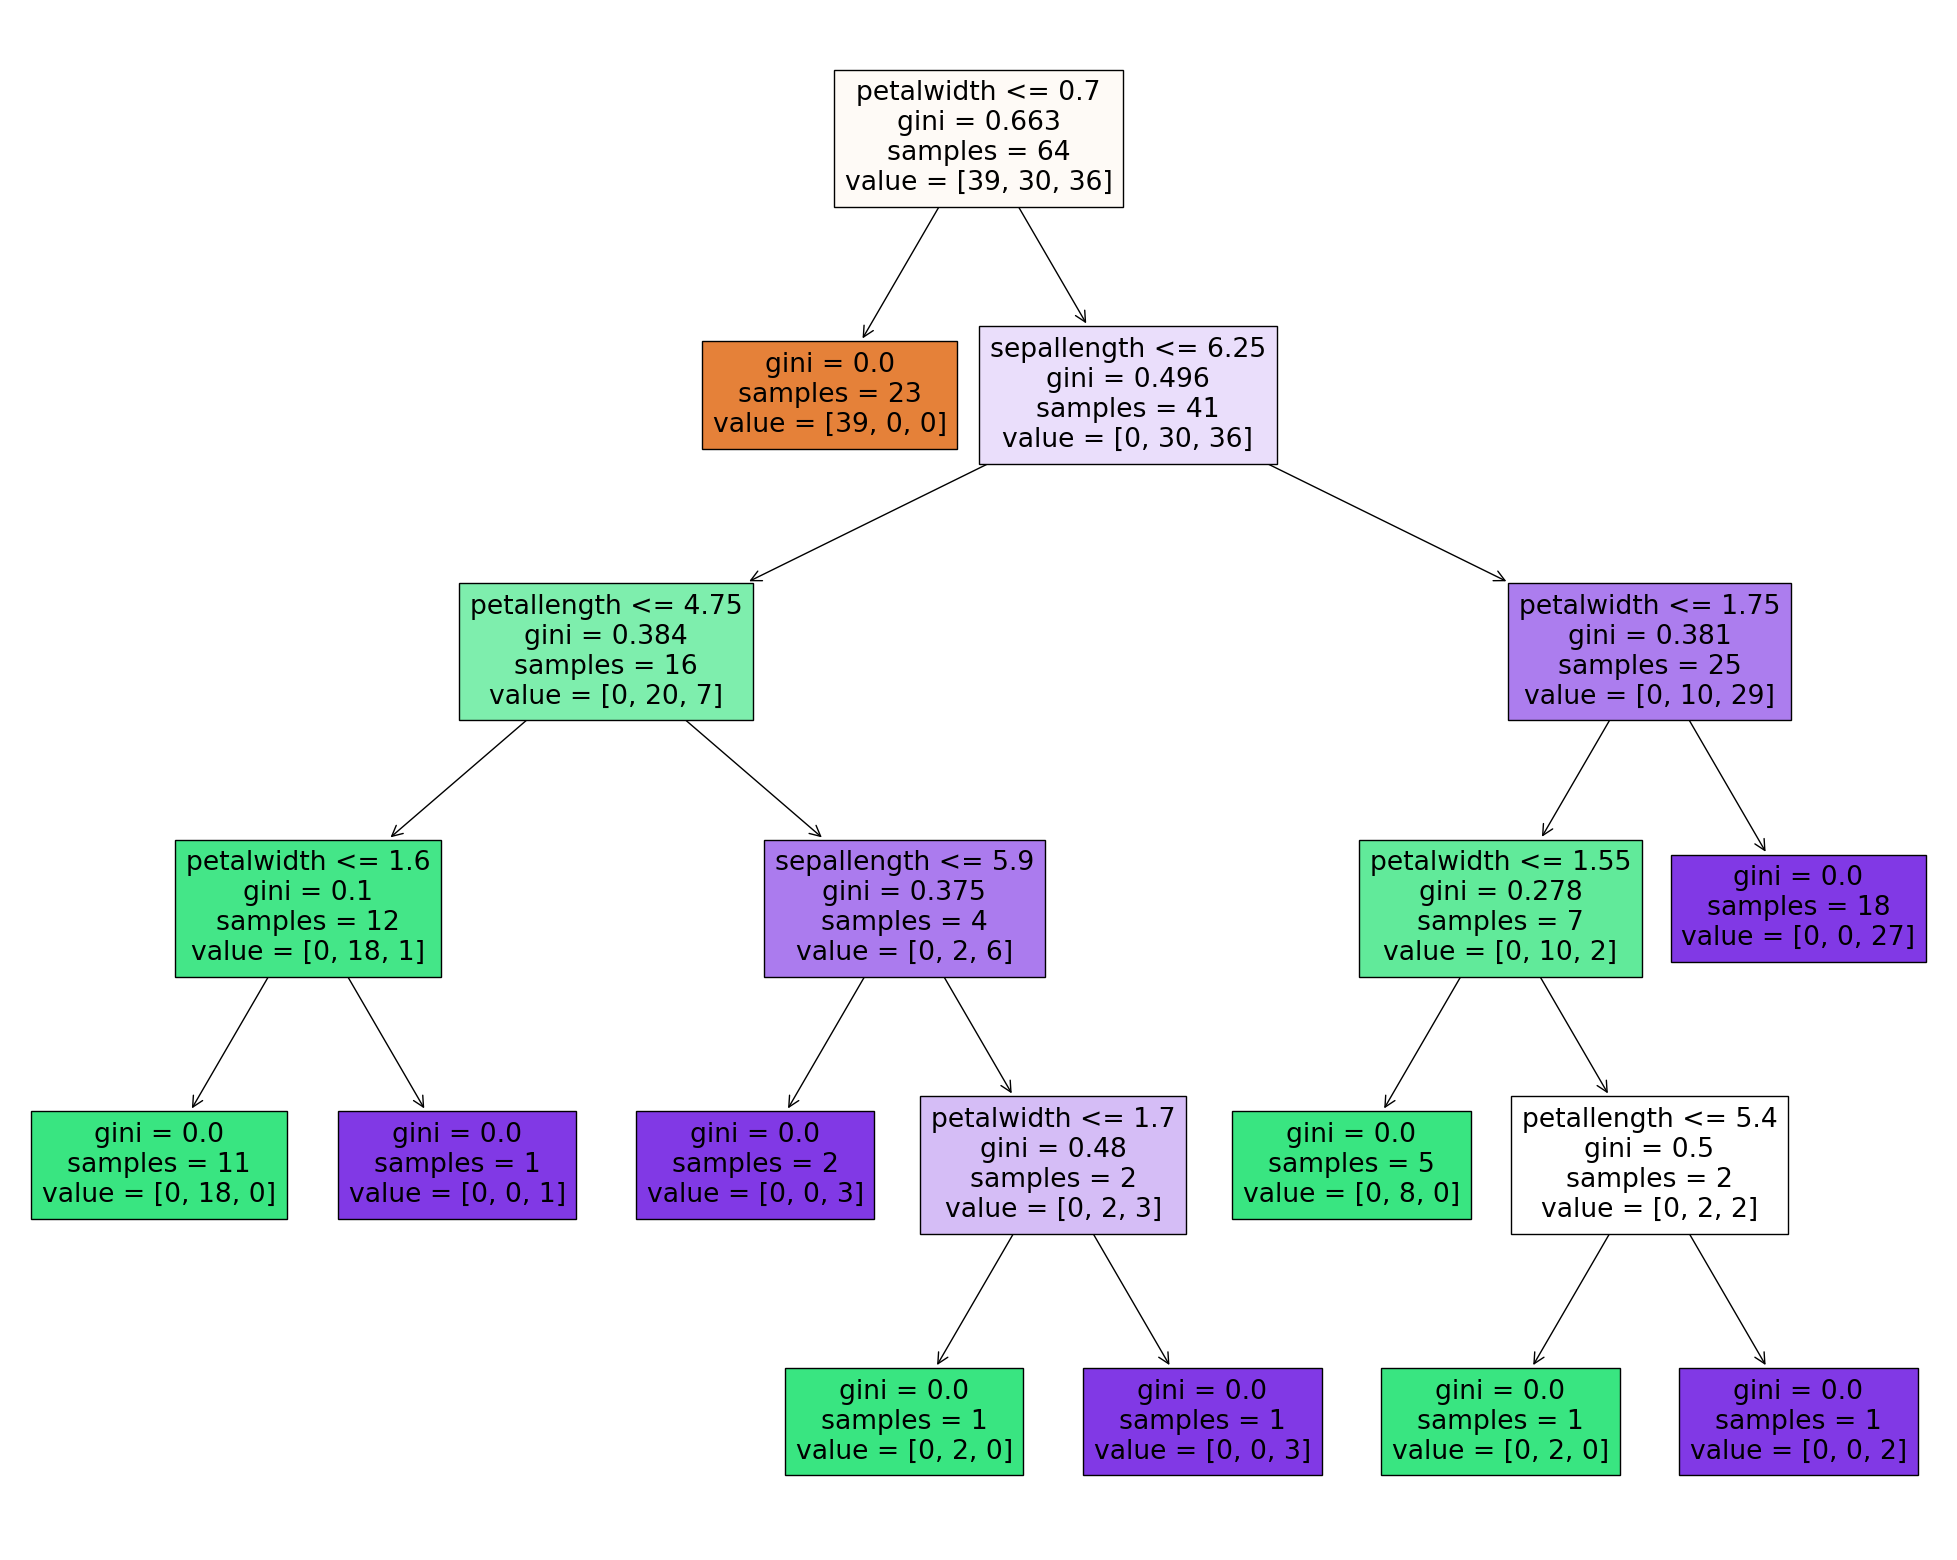

In [17]:
# Plot first decision tree
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
a = tree.plot_tree(clf.estimators_[0], feature_names = X.columns, filled=True)

In [18]:
clf.estimators_[1]

DecisionTreeClassifier(max_features='auto', random_state=196706925)

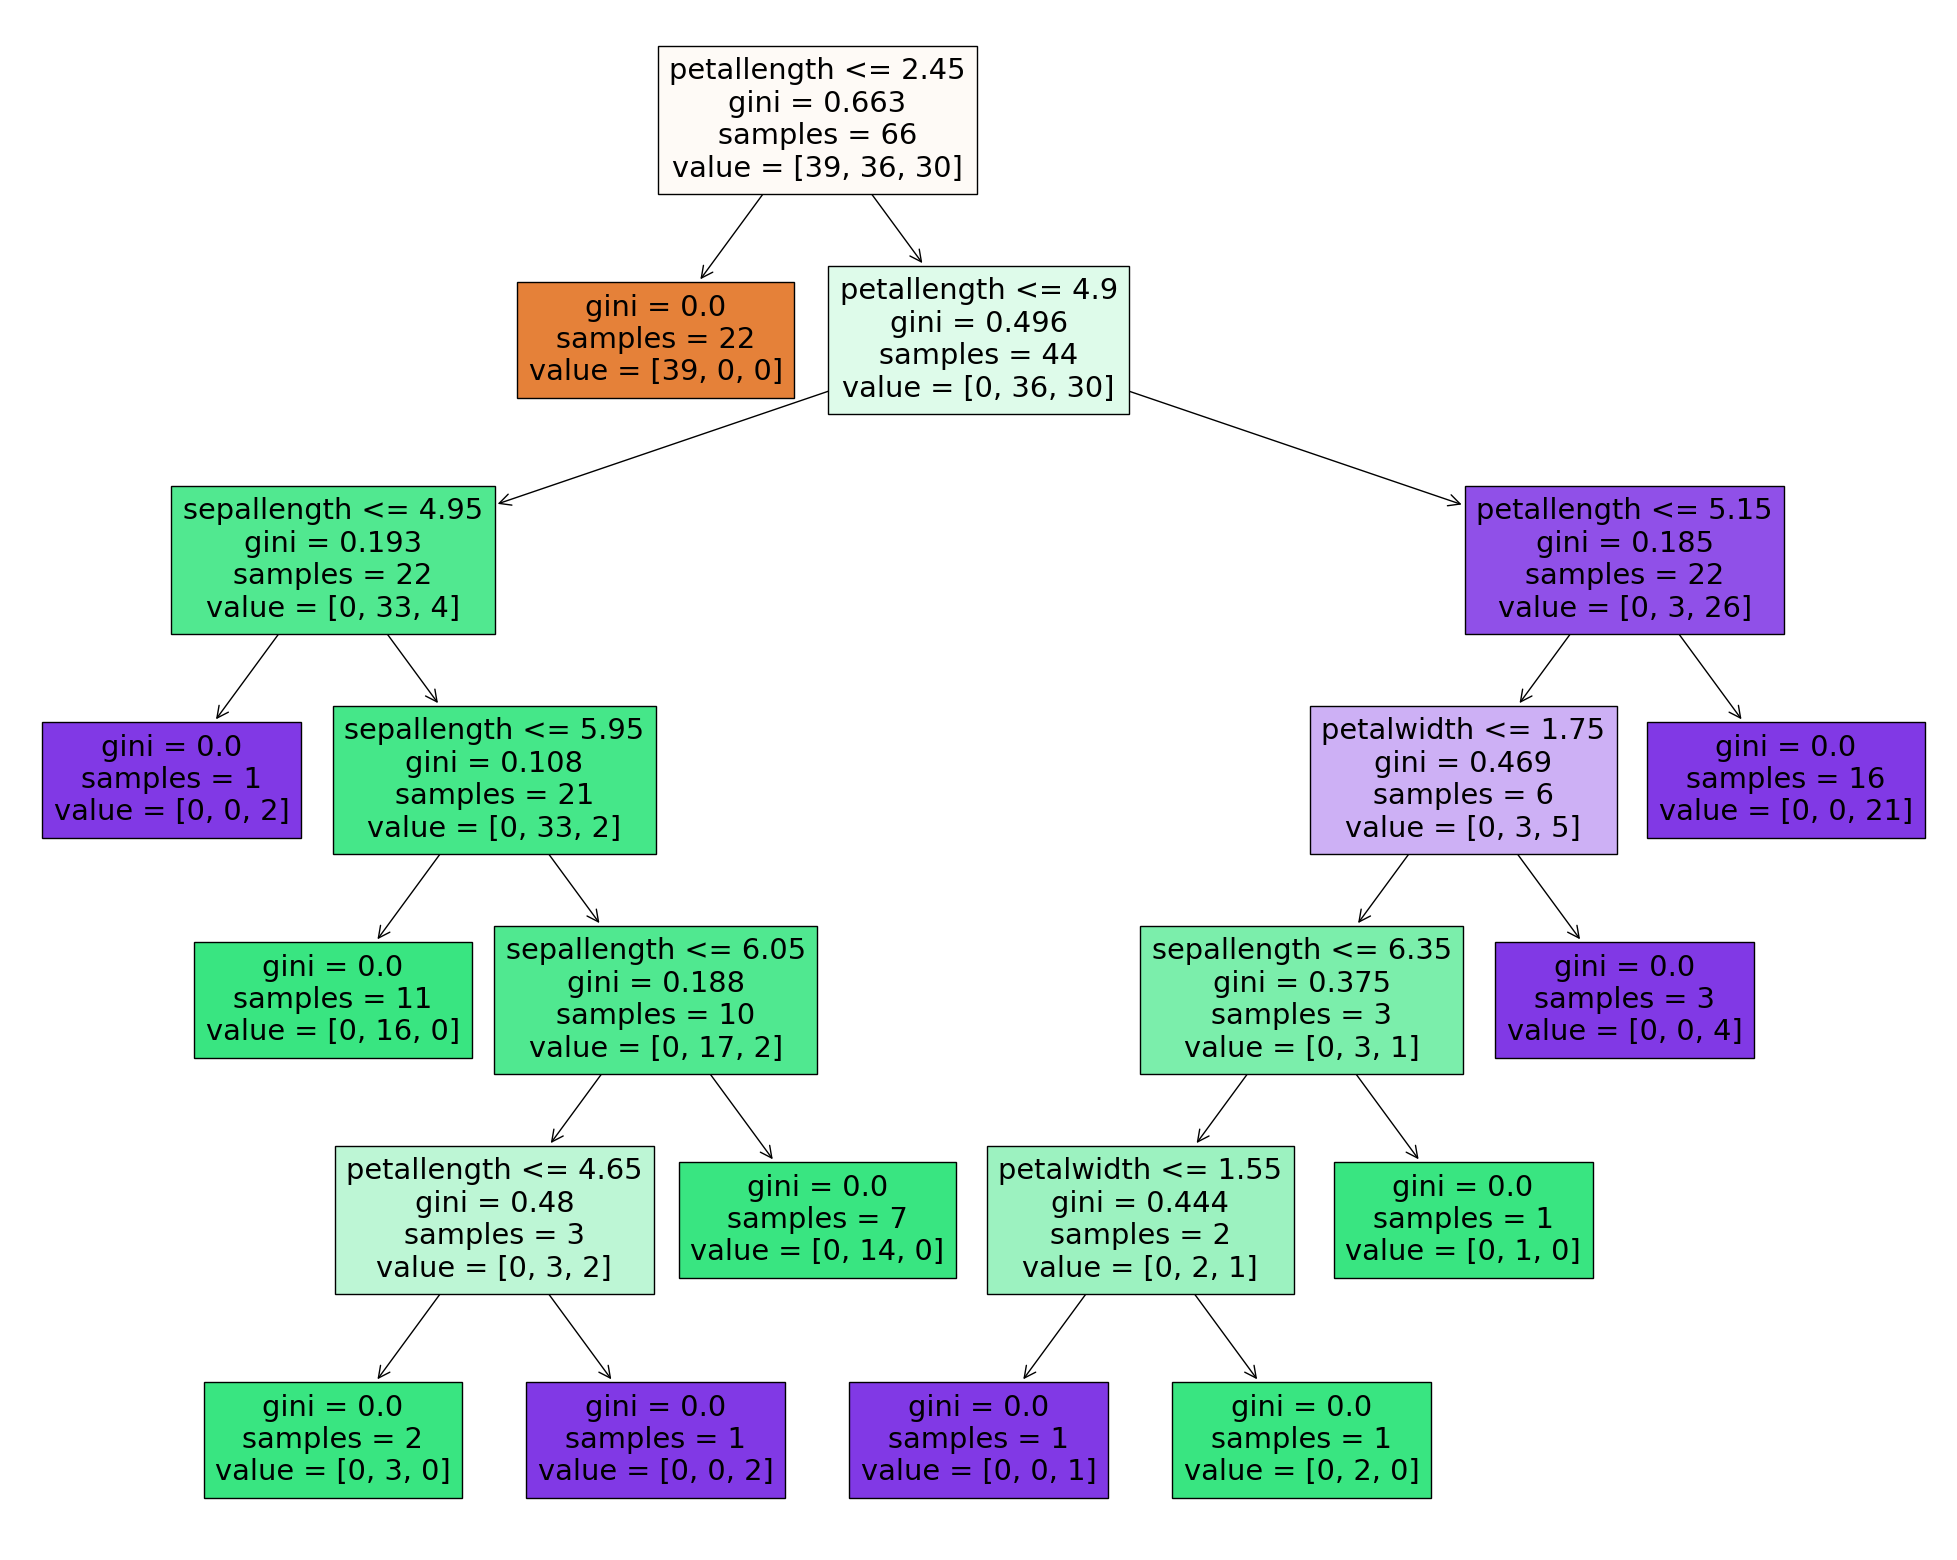

In [19]:
# Plot second decision tree
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
a = tree.plot_tree(clf.estimators_[1], feature_names = X.columns, filled=True)